In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. bolzano'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,21,P.A. Bolzano,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,14.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-02-17T17:00:00,21,P.A. Bolzano,254,39,293,7519,7812,-137,450,...,5.0,9383.0,647.0,-137.0,13.31,3.75,4.80,69.55,0.00,-1.72
359,2021-02-18T17:00:00,21,P.A. Bolzano,253,37,290,7563,7853,41,478,...,5.0,11832.0,668.0,44.0,12.76,3.69,4.04,71.56,-5.13,0.52
360,2021-02-19T17:00:00,21,P.A. Bolzano,254,36,290,6988,7278,-575,524,...,9.0,10246.0,587.0,-575.0,12.41,3.98,5.11,89.27,-2.70,-7.32
361,2021-02-20T17:00:00,21,P.A. Bolzano,249,36,285,6846,7131,-147,477,...,4.0,11195.0,660.0,-142.0,12.63,4.00,4.26,72.27,0.00,-2.02


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 313
Nuovi tamponi: 6530.0
Percentuale nuovi positivi/nuovi tamponi: 4.8 %
Nuovi guariti: 479.0
Nuovi deceduti: 6.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -169.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,21,P.A. Bolzano,170,19,189,9025,9214,-141,131,...,1.0,2259.0,538.0,-131.0,10.05,2.05,5.80,24.35,-17.39,-1.51
1,2020-12-24T17:00:00,21,P.A. Bolzano,157,17,174,8933,9107,-107,142,...,5.0,1886.0,556.0,-92.0,9.77,1.91,7.53,25.54,-10.53,-1.16
2,2020-12-25T17:00:00,21,P.A. Bolzano,147,19,166,10398,10564,1457,182,...,7.0,2024.0,1524.0,1465.0,11.45,1.57,8.99,11.94,11.76,16.00
3,2020-12-26T17:00:00,21,P.A. Bolzano,155,17,172,10394,10566,2,24,...,7.0,279.0,-865.0,-4.0,9.88,1.63,8.60,-2.77,-10.53,0.02
4,2020-12-27T17:00:00,21,P.A. Bolzano,154,20,174,10406,10580,14,57,...,2.0,790.0,233.0,12.0,11.49,1.64,7.22,24.46,17.65,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-17T17:00:00,21,P.A. Bolzano,254,39,293,7519,7812,-137,450,...,5.0,9383.0,647.0,-137.0,13.31,3.75,4.80,69.55,0.00,-1.72
57,2021-02-18T17:00:00,21,P.A. Bolzano,253,37,290,7563,7853,41,478,...,5.0,11832.0,668.0,44.0,12.76,3.69,4.04,71.56,-5.13,0.52
58,2021-02-19T17:00:00,21,P.A. Bolzano,254,36,290,6988,7278,-575,524,...,9.0,10246.0,587.0,-575.0,12.41,3.98,5.11,89.27,-2.70,-7.32
59,2021-02-20T17:00:00,21,P.A. Bolzano,249,36,285,6846,7131,-147,477,...,4.0,11195.0,660.0,-142.0,12.63,4.00,4.26,72.27,0.00,-2.02


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

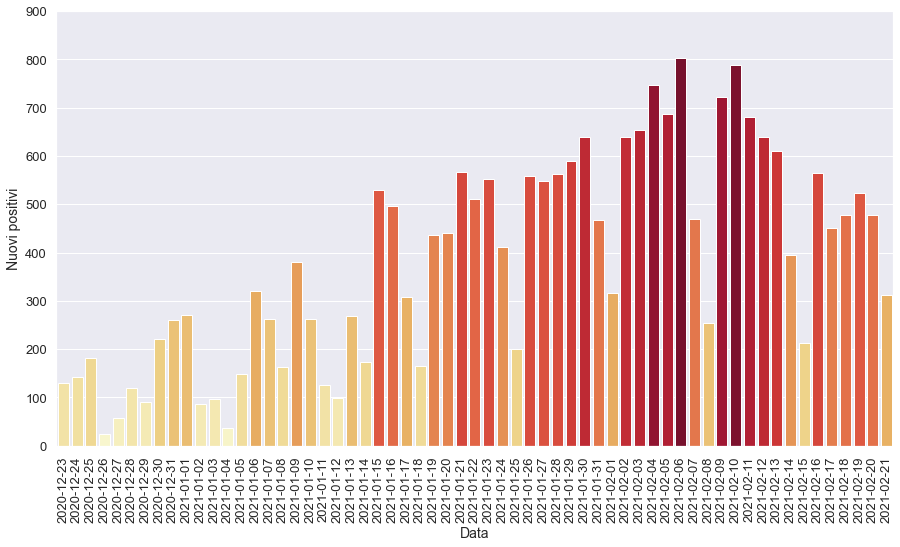

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

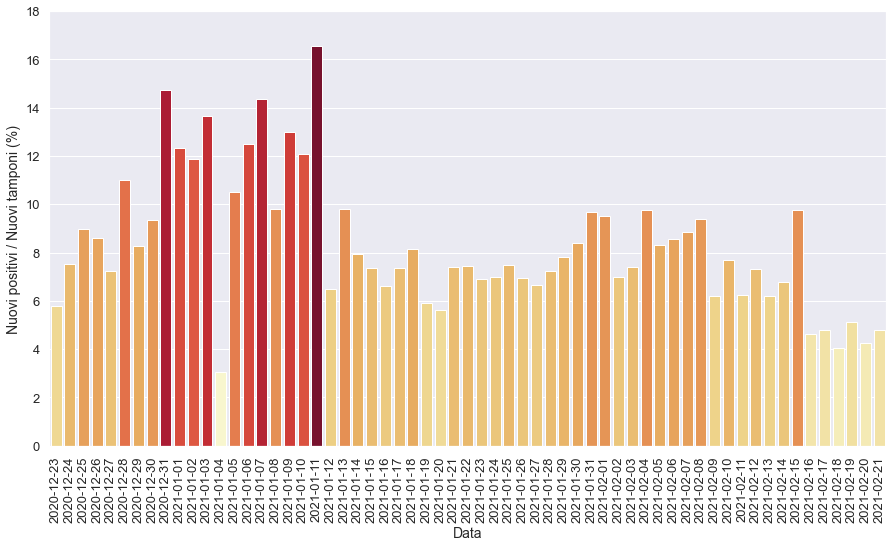

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

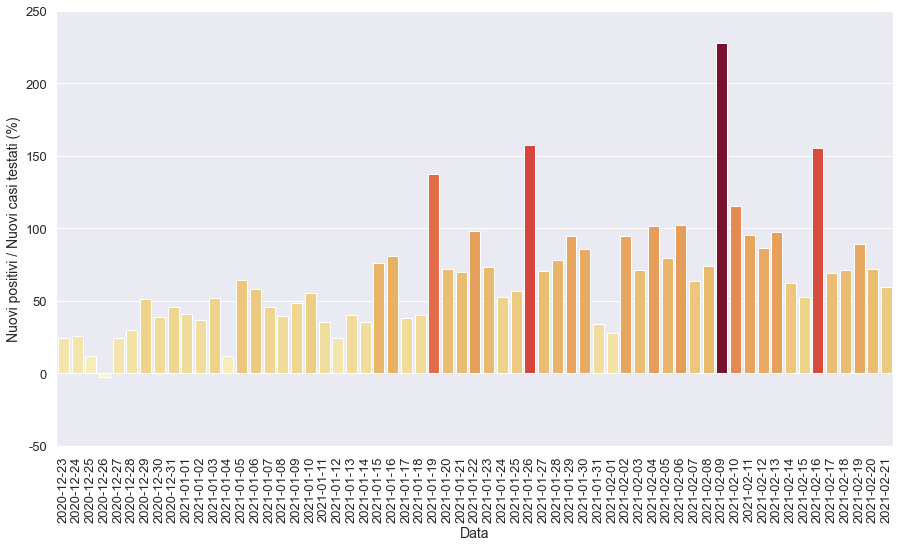

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

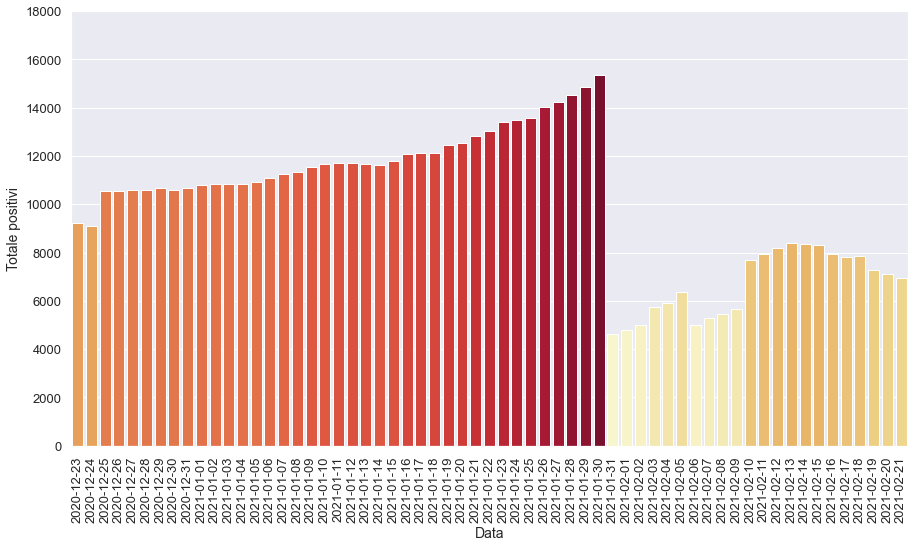

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

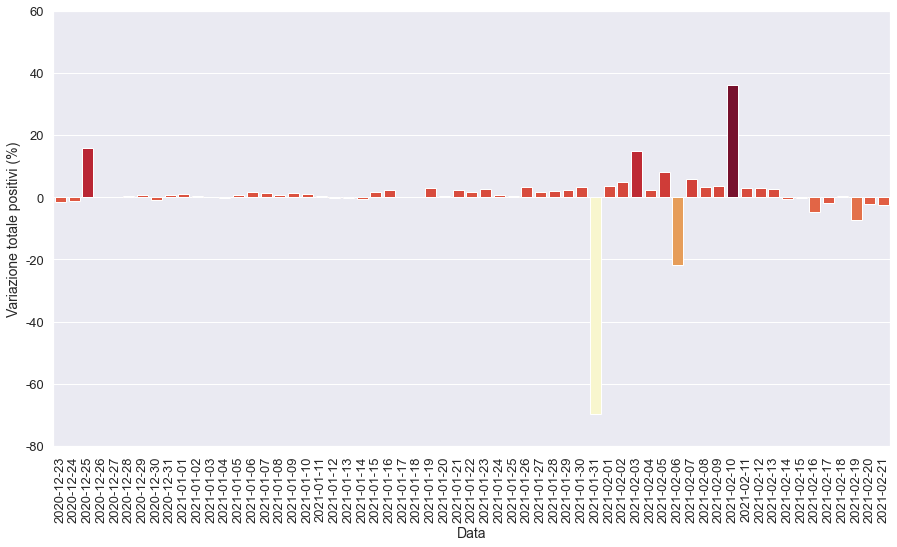

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

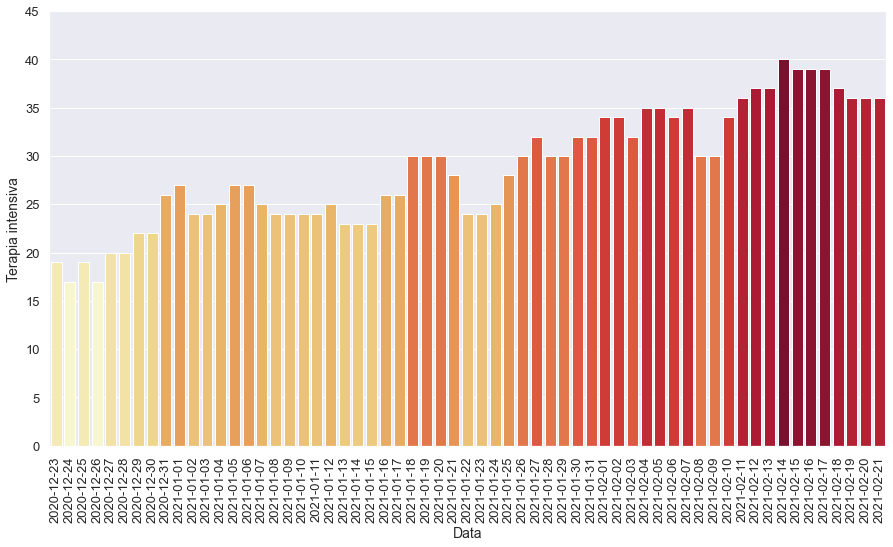

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

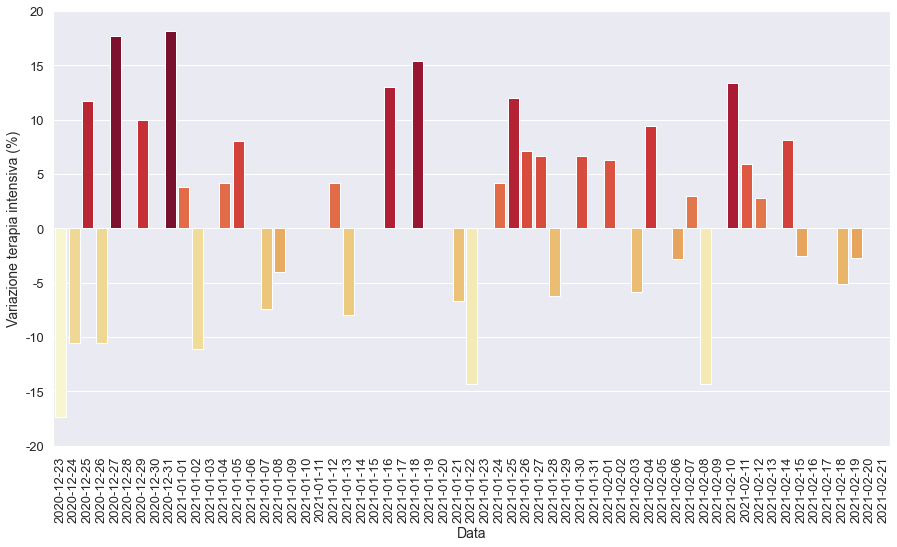

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

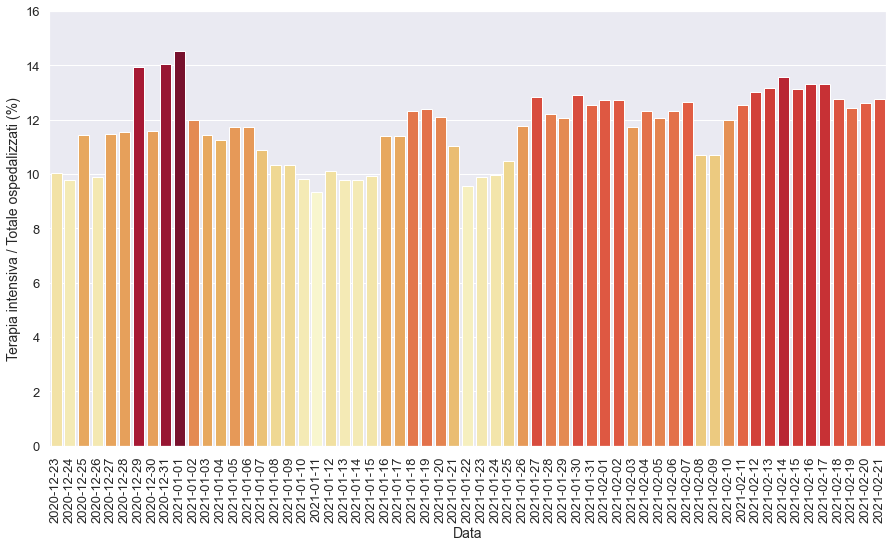

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

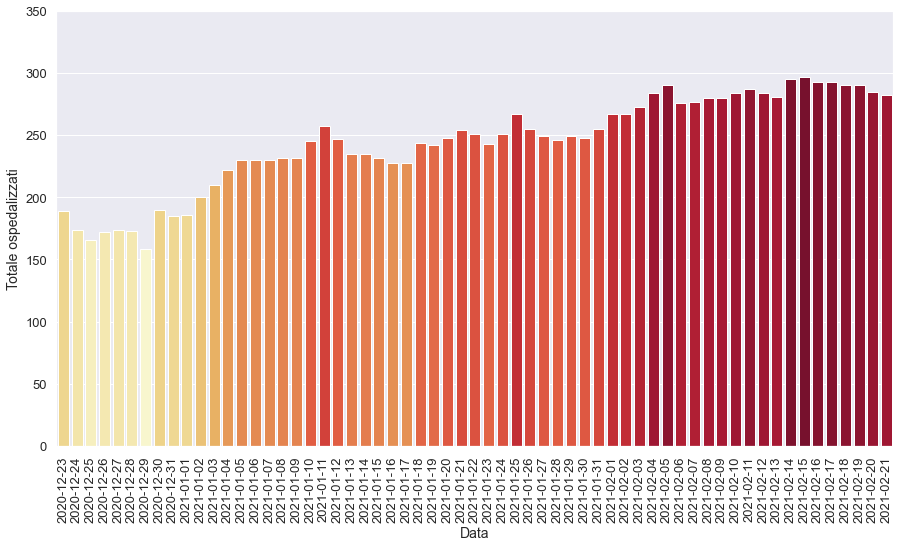

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

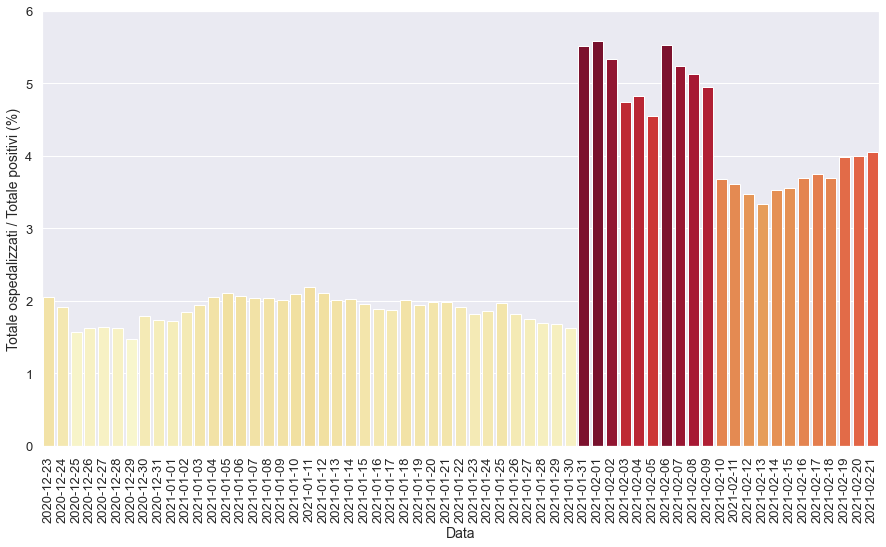

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

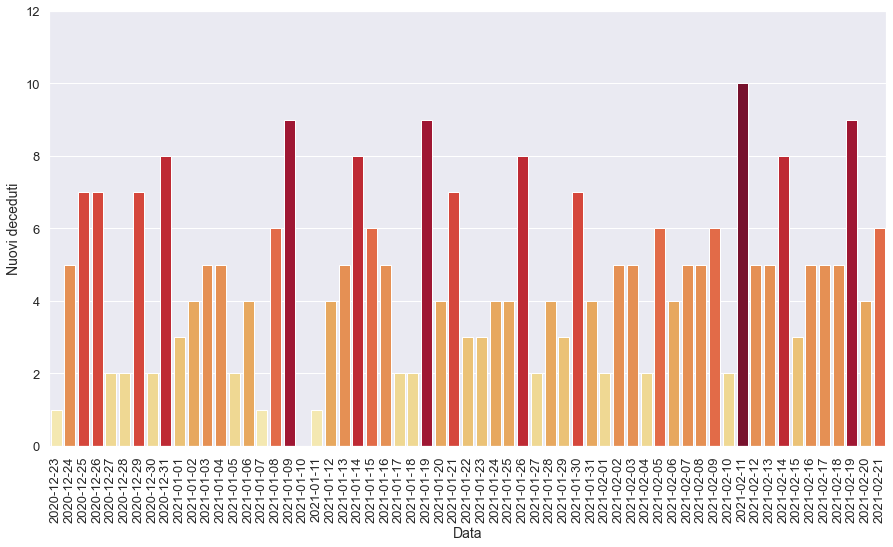

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

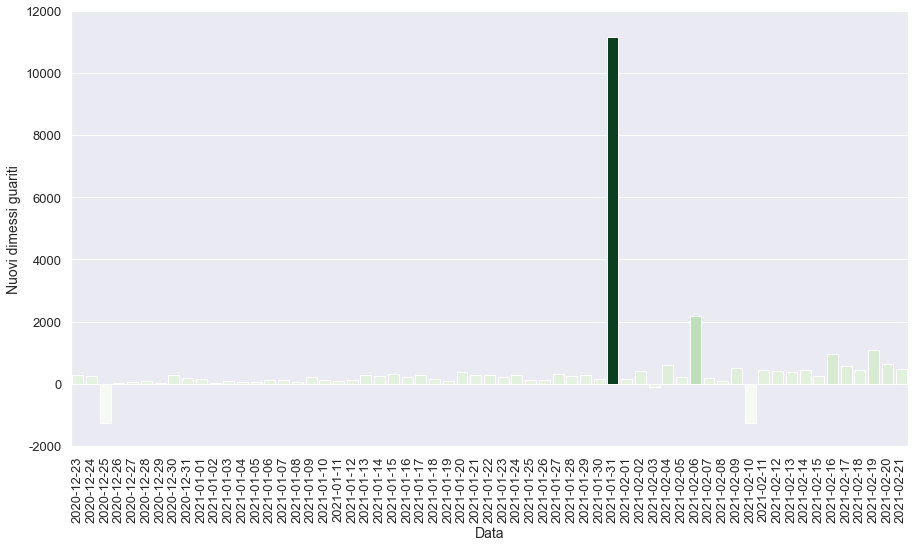

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-22T17:00:00,21,P.A. Bolzano,227,24,251,12790,13041,218,510,...,3.0,6836.0,520.0,221.0,9.56,1.92,7.46,98.08,-14.29,1.70
1,2021-01-23T17:00:00,21,P.A. Bolzano,219,24,243,13143,13386,345,552,...,3.0,7972.0,750.0,353.0,9.88,1.82,6.92,73.60,0.00,2.65
2,2021-01-24T17:00:00,21,P.A. Bolzano,226,25,251,13248,13499,113,412,...,4.0,5890.0,785.0,105.0,9.96,1.86,6.99,52.48,4.17,0.84
3,2021-01-25T17:00:00,21,P.A. Bolzano,239,28,267,13308,13575,76,200,...,4.0,2669.0,351.0,60.0,10.49,1.97,7.49,56.98,12.00,0.56
4,2021-01-26T17:00:00,21,P.A. Bolzano,225,30,255,13751,14006,431,559,...,8.0,8051.0,355.0,443.0,11.76,1.82,6.94,157.46,7.14,3.17
5,2021-01-27T17:00:00,21,P.A. Bolzano,217,32,249,13995,14244,238,548,...,2.0,8236.0,774.0,244.0,12.85,1.75,6.65,70.80,6.67,1.70
6,2021-01-28T17:00:00,21,P.A. Bolzano,216,30,246,14294,14540,296,562,...,4.0,7767.0,717.0,299.0,12.20,1.69,7.24,78.38,-6.25,2.08
7,2021-01-29T17:00:00,21,P.A. Bolzano,219,30,249,14613,14862,322,590,...,3.0,7537.0,624.0,319.0,12.05,1.68,7.83,94.55,0.00,2.21
8,2021-01-30T17:00:00,21,P.A. Bolzano,216,32,248,15083,15331,469,640,...,7.0,7622.0,745.0,470.0,12.90,1.62,8.40,85.91,6.67,3.16
9,2021-01-31T17:00:00,21,P.A. Bolzano,223,32,255,4363,4618,-10713,467,...,4.0,4822.0,1379.0,-10720.0,12.55,5.52,9.68,33.87,0.00,-69.88


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

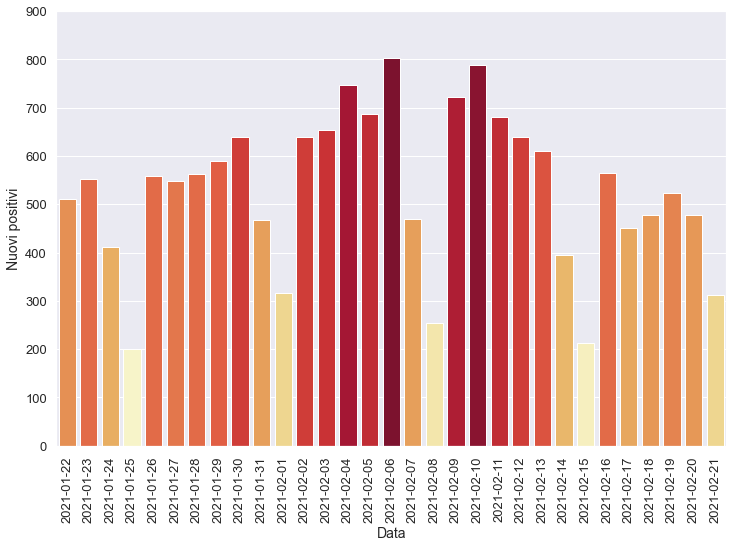

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

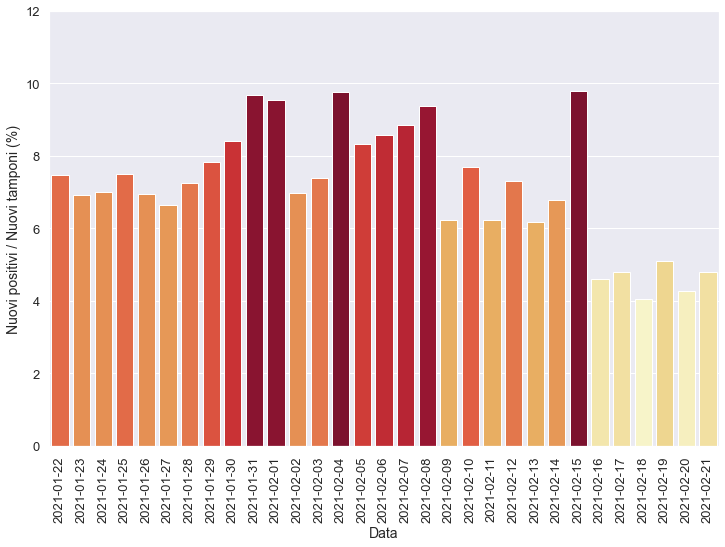

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

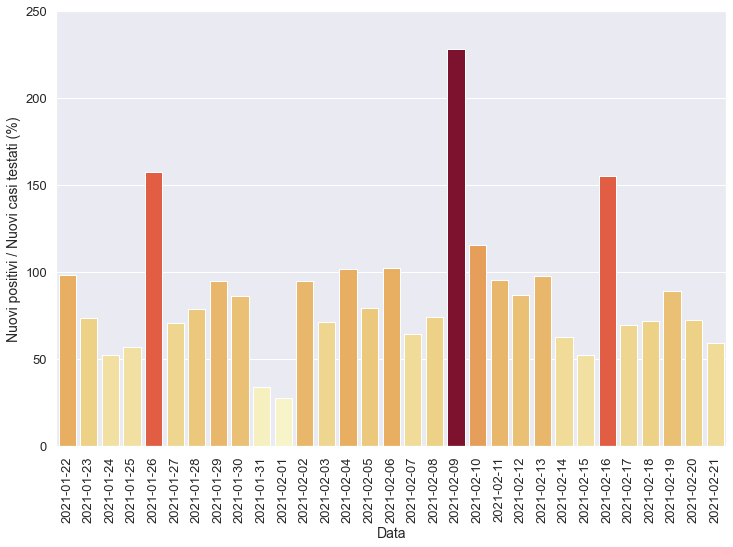

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

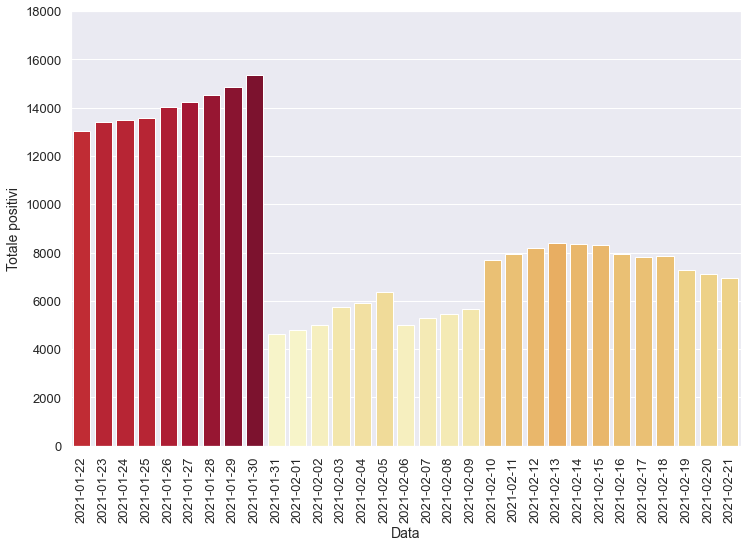

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

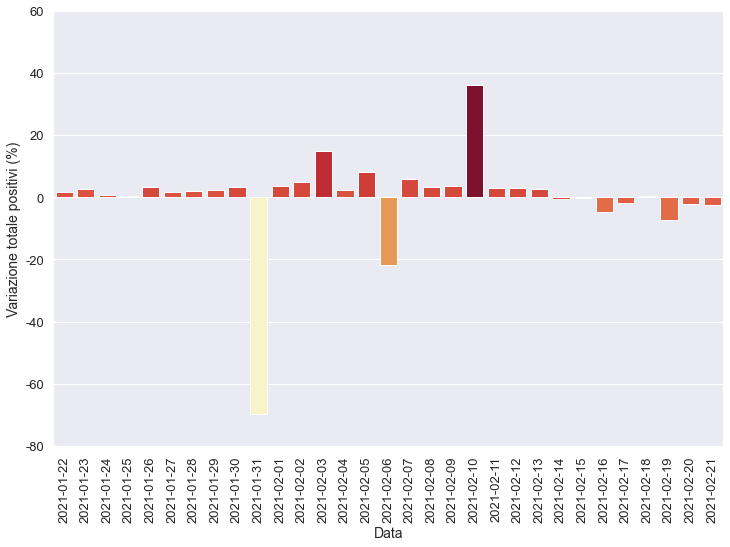

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

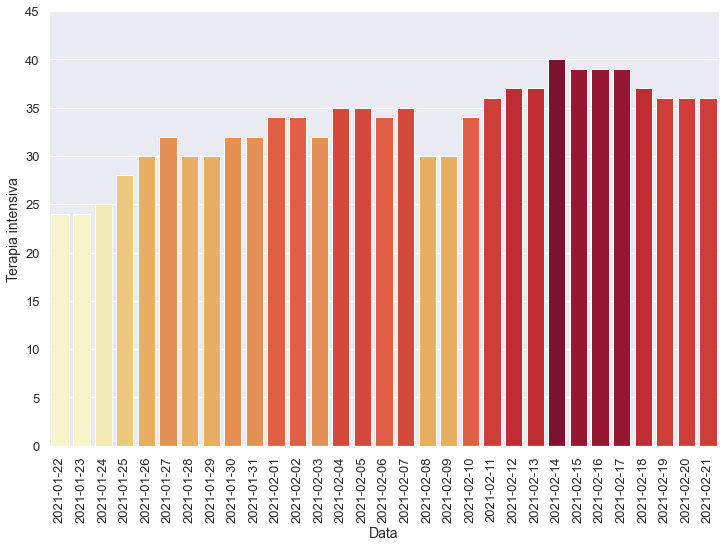

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

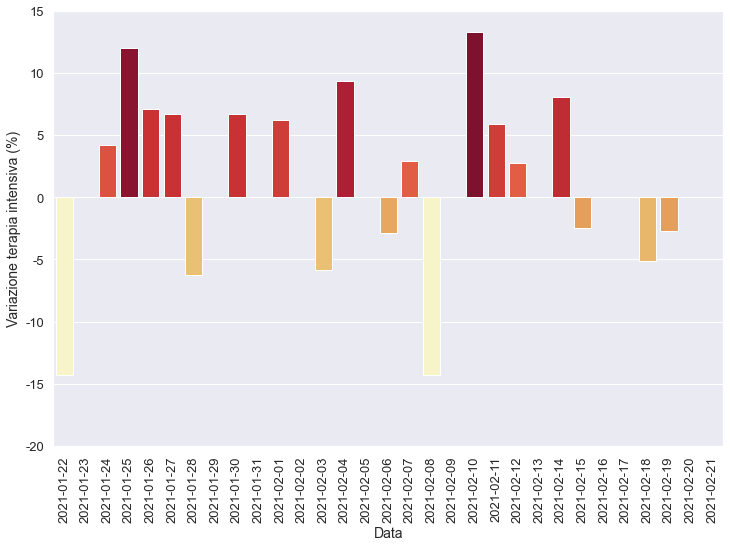

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

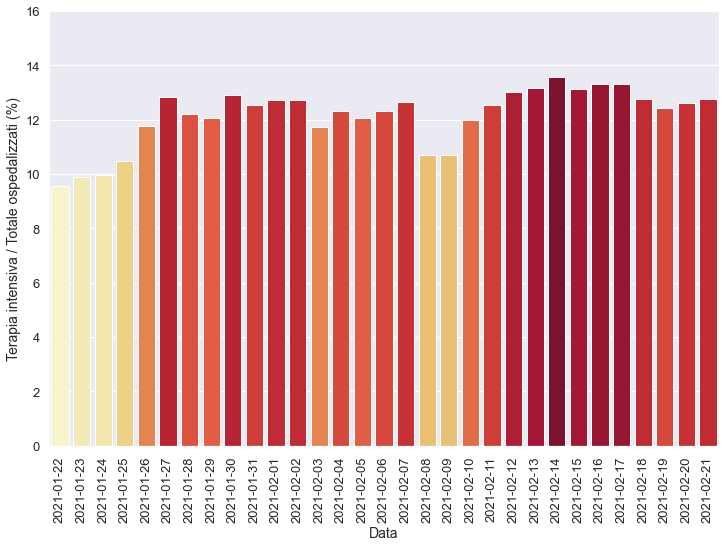

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

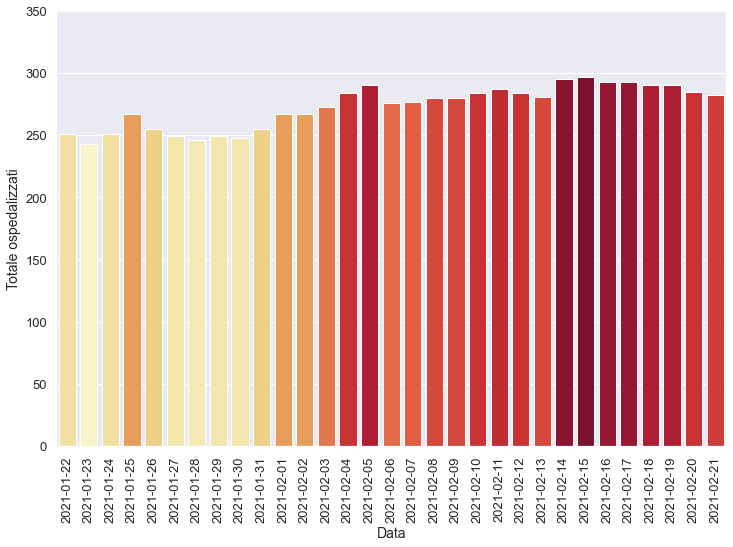

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

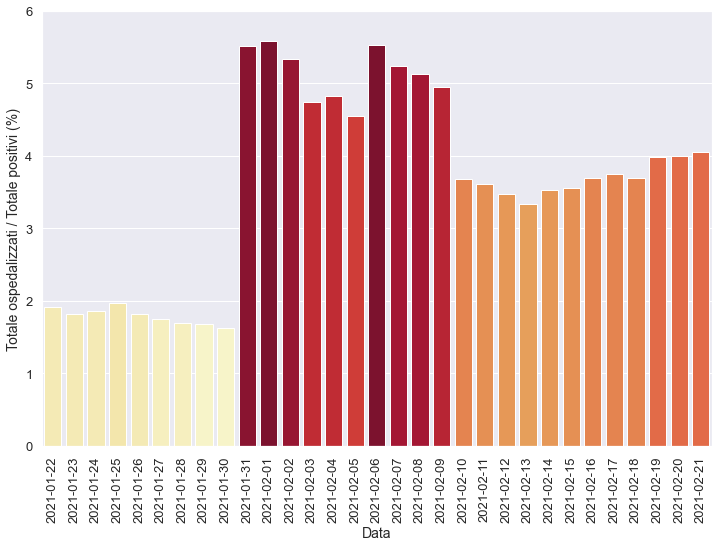

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

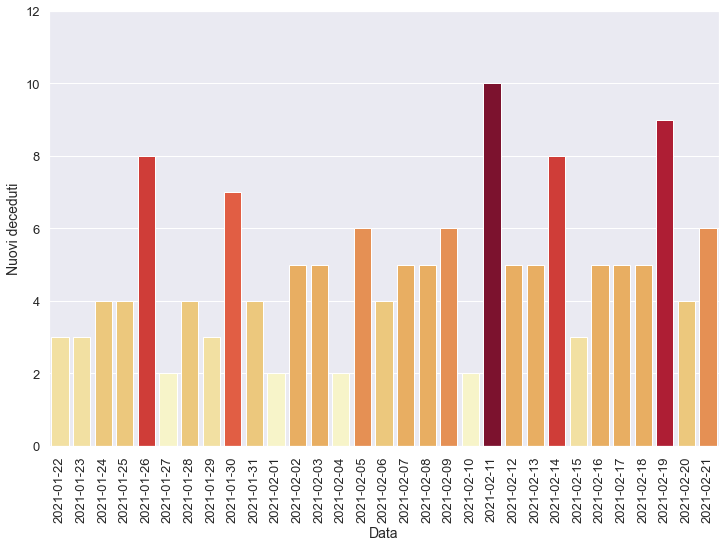

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

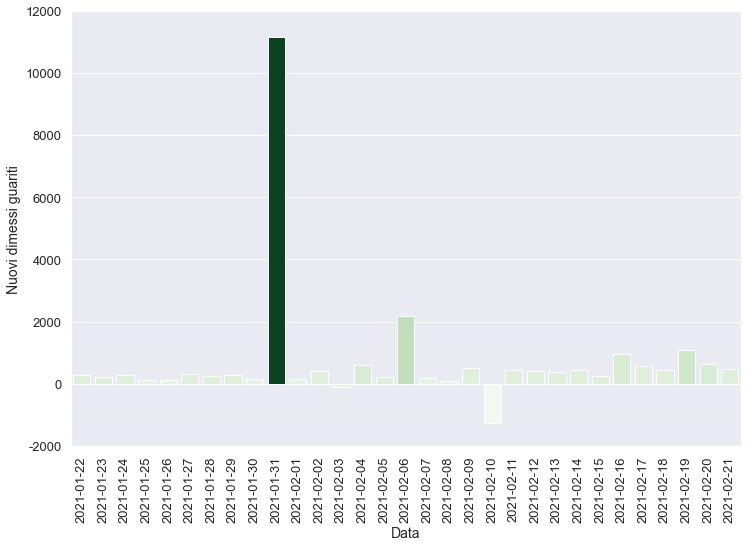

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,21,P.A. Bolzano,255,40,295,8063,8358,-53,395,...,8.0,5829.0,634.0,-67.0,13.56,3.53,6.78,62.30,8.11,-0.63
1,2021-02-15T17:00:00,21,P.A. Bolzano,258,39,297,8034,8331,-27,212,...,3.0,2167.0,404.0,-29.0,13.13,3.56,9.78,52.48,-2.50,-0.32
2,2021-02-16T17:00:00,21,P.A. Bolzano,254,39,293,7656,7949,-382,564,...,5.0,12229.0,363.0,-378.0,13.31,3.69,4.61,155.37,0.00,-4.59
3,2021-02-17T17:00:00,21,P.A. Bolzano,254,39,293,7519,7812,-137,450,...,5.0,9383.0,647.0,-137.0,13.31,3.75,4.80,69.55,0.00,-1.72
4,2021-02-18T17:00:00,21,P.A. Bolzano,253,37,290,7563,7853,41,478,...,5.0,11832.0,668.0,44.0,12.76,3.69,4.04,71.56,-5.13,0.52
5,2021-02-19T17:00:00,21,P.A. Bolzano,254,36,290,6988,7278,-575,524,...,9.0,10246.0,587.0,-575.0,12.41,3.98,5.11,89.27,-2.70,-7.32
6,2021-02-20T17:00:00,21,P.A. Bolzano,249,36,285,6846,7131,-147,477,...,4.0,11195.0,660.0,-142.0,12.63,4.00,4.26,72.27,0.00,-2.02
7,2021-02-21T17:00:00,21,P.A. Bolzano,246,36,282,6677,6959,-172,313,...,6.0,6530.0,528.0,-169.0,12.77,4.05,4.79,59.28,0.00,-2.41


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

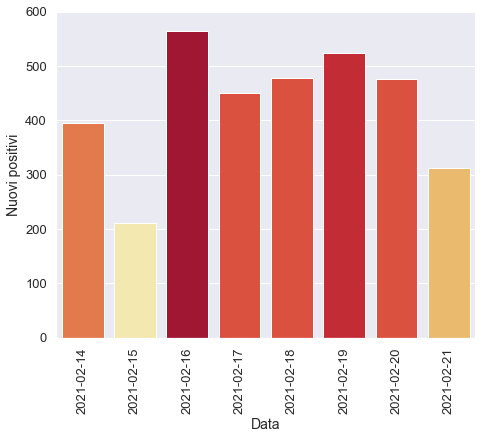

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

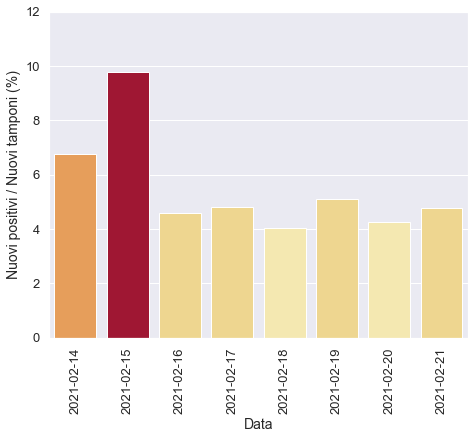

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

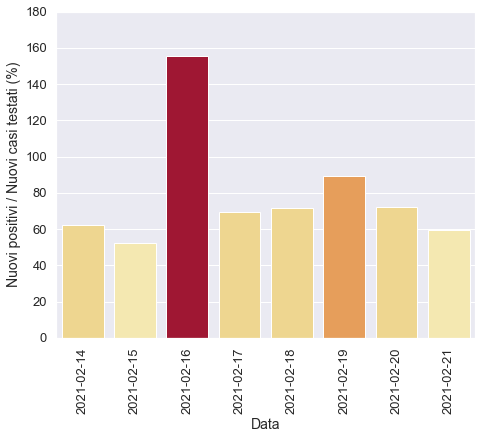

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

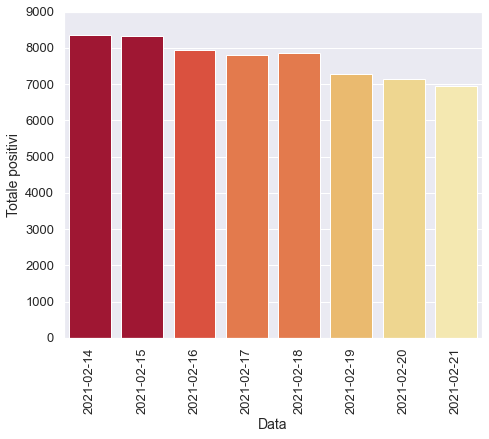

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

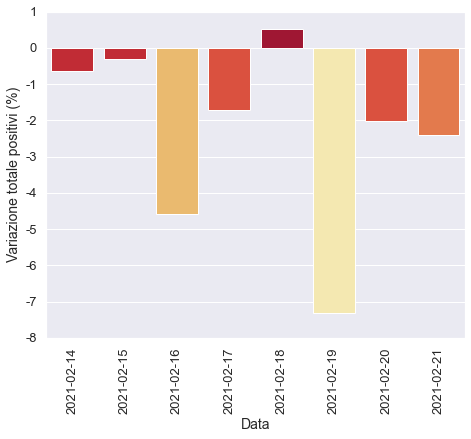

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

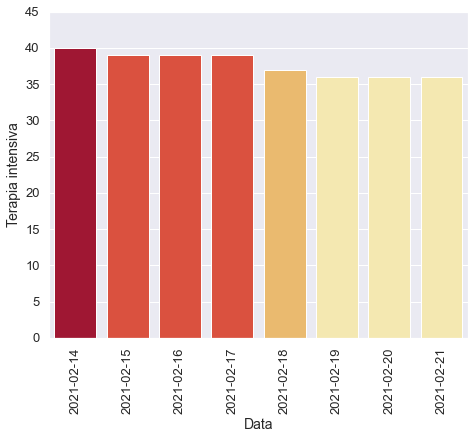

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

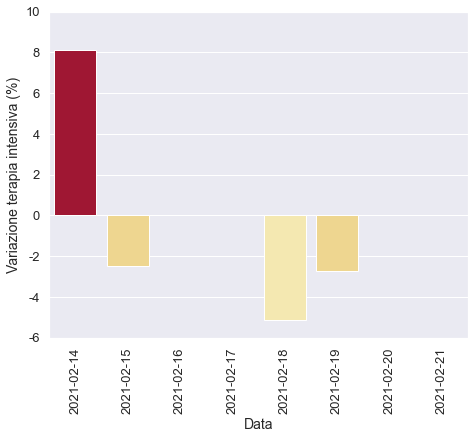

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

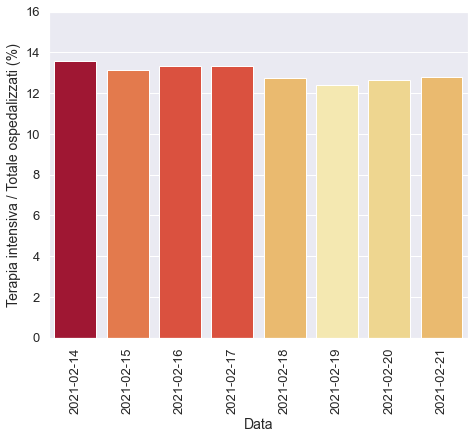

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

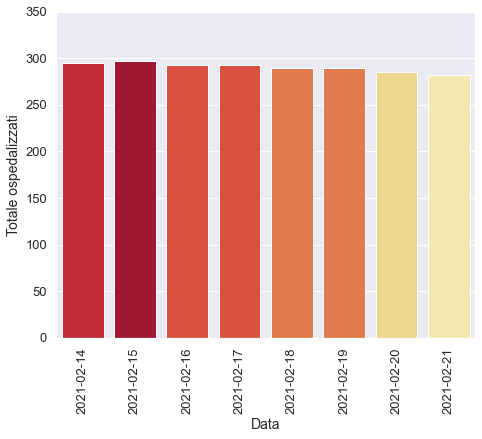

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

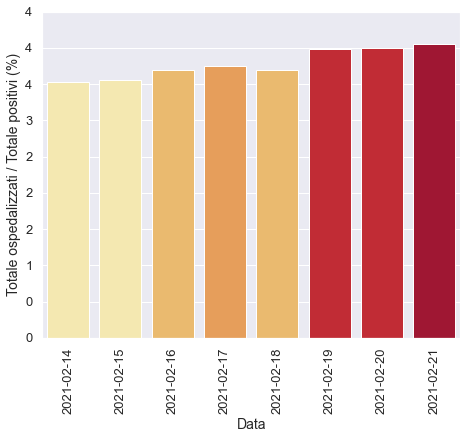

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

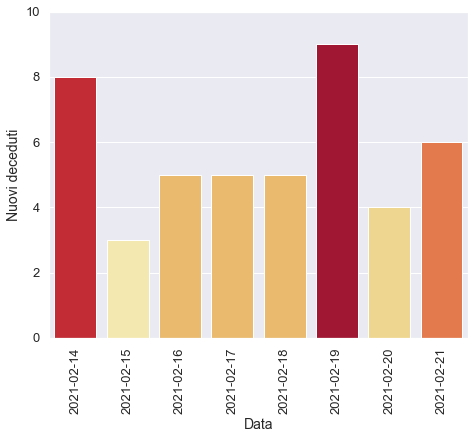

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

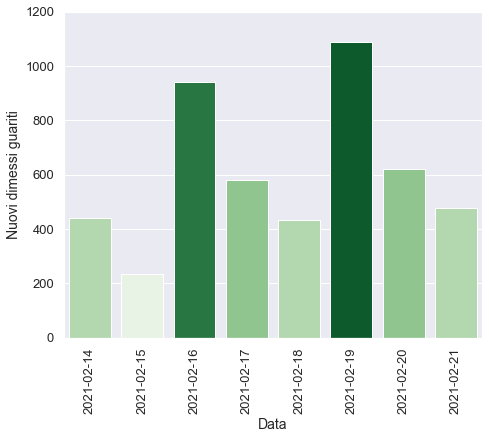

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)